**DEEP LEARNING AND CONVOLUTIONAL NEURAL NETWORKS**

In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
#Visualizacion de los datos
import matplotlib.pyplot as plt
%matplotlib inline

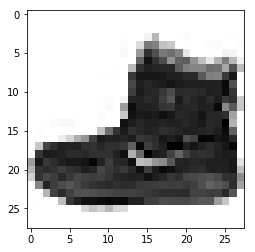

In [0]:
plt.imshow(x_train[0],cmap='gray_r')

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [0]:
from keras.utils import to_categorical

y_cat_train = to_categorical(y_train)

y_cat_test = to_categorical(y_test)

In [0]:
#Compilar el modelo
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train,y_cat_train,epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
60000/60000 [==============================] - 38s 633us/step - loss: 0.4054 - acc: 0.8556
Epoch 2/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.2812 - acc: 0.8994
Epoch 3/10
60000/60000 [==============================] - 37s 619us/step - loss: 0.2413 - acc: 0.9135
Epoch 4/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.2169 - acc: 0.9228
Epoch 5/10
60000/60000 [==============================] - 37s 614us/step - loss: 0.1972 - acc: 0.9304
Epoch 6/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.1806 - acc: 0.9349
Epoch 7/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.1672 - acc: 0.9410
Epoch 8/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.1557 - acc: 0.9461
Epoch 9/10
60000/60000 [==============================] - 36s 608us/step - loss: 0.1468 - 

In [0]:
model.evaluate(x_test,y_cat_test)

In [0]:
model.metrics_names

In [0]:
from sklearn.metrics import classification_report

In [0]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))